# import the modules.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [2]:
# load the file
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning.

# a) Check for missing values in all columns

In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataframe

# b) Check for duplicates in the DataFrame

In [5]:
insurance_data.duplicated().sum()

1

 We have a duplicate value!

In [6]:
# remove duplicates from the DataFrame
insurance_data = insurance_data.drop_duplicates()

# Overview of the dataset.

In [7]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The DataFrame has 1,337 rows and 7 columns

In [8]:
#look at the dataset info and dtypes.
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
# Number of unique values in the columns
insurance_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Summary Statistics.

In [10]:
insurance_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


1) Count:There are 1337 entries in each column. This shows that there is no column with a missing entry.

2) 25%(1st Quartile) : AGE: 25% of the entries of people in our dataset are below 27 years old.
                       BMI : 25% of the entries of people in our dataset have a BMI lower than 26.29.
                       CHILDREN: 25% of entries of the people have no children.
                       CHARGES: 25% of the entries of charges are less than 4746.344

3) 75%(3rd Quartile): AGE: 25% of the entries of people are above the age of 51 years old.
                      BMI : 25% of the entries of people have a BMI above 34.7
                      CHILDREN: 25% of the entries of people have more than 2 children.
                      CHARGES: 25% of the entries people were charged more than 16,657.717450.

4) Minimum(min) : AGE: the youngest age is 18 years.
                  BMI: the lowest BMI is 15.96.
                  CHILDREN: there are entries which show some people had no children.
                  CHARGES: the lowest charge is 1121.8739
                  
5) Maximum(max): AGE: the oldest age is 64 years.
                  BMI: the highest BMI is 53.13.
                  CHILDREN: the highest number of children is 5.
                  CHARGES: the highest charge is 63,770.428010.
                  
6) Standard Deviation(std): AGE: 14.0443 suggests a moderate spread in ages.
                            BMI : 6.100468 suggests a moderate variation in BMI.
                            CHILDREN: 1.205571 suggests that most of the entries of people have a similar number of                                                   children with a few having more.
                            CHARGES: 12,110.359656 suggests that the charges were widely spread from the lowest number to the                                         highest number.
                                
                  

## Let's take the columns with categorical data.

In [11]:
# select a subset from the DataFrame.
categorical_data = insurance_data[['sex', 'smoker', 'region']]

In [12]:
categorical_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


## Visualize the Categorical data.


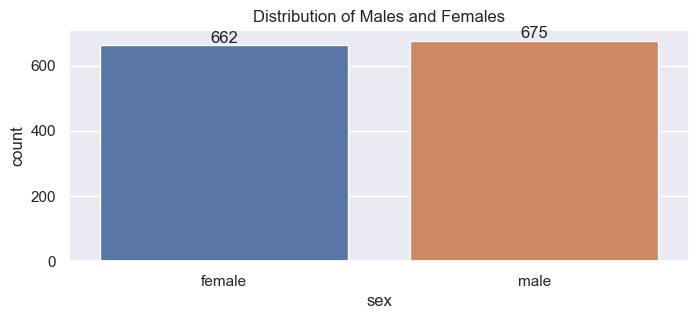

In [13]:
# frequency plot to represent the genders.
plt.figure(figsize=(8, 3))
sns.set_theme()
plt.title('Distribution of Males and Females')
ax = sns.countplot(x='sex', data=categorical_data)

for container in ax.containers:
    ax.bar_label(container)

We can see that the males are sligtly more that the females.

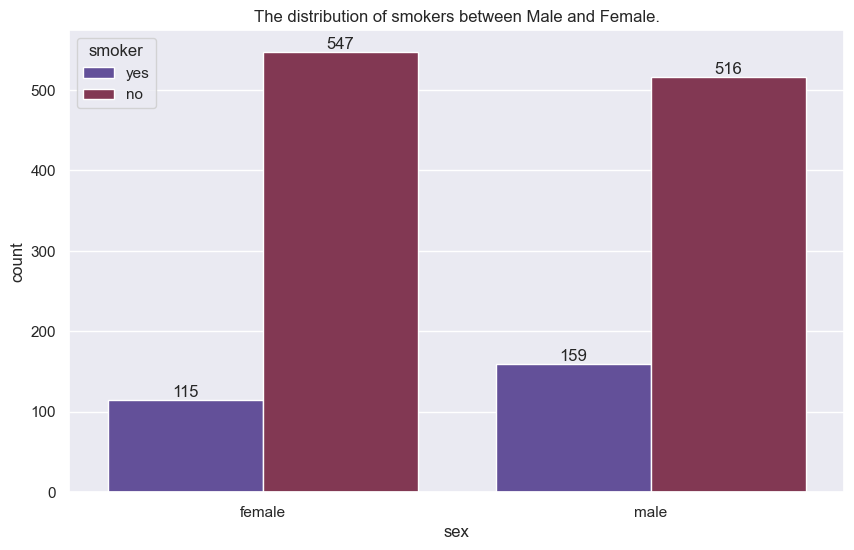

In [14]:
# frequency plot representing the sex and those who smoke.
plt.figure(figsize=(10, 6))
sns.set_theme()
plt.title('The distribution of smokers between Male and Female.')
ax = sns.countplot(x='sex', hue='smoker', data = categorical_data, palette ='twilight')
for container in ax.containers:
    ax.bar_label(container)

We can see that more males practice smoking than females.

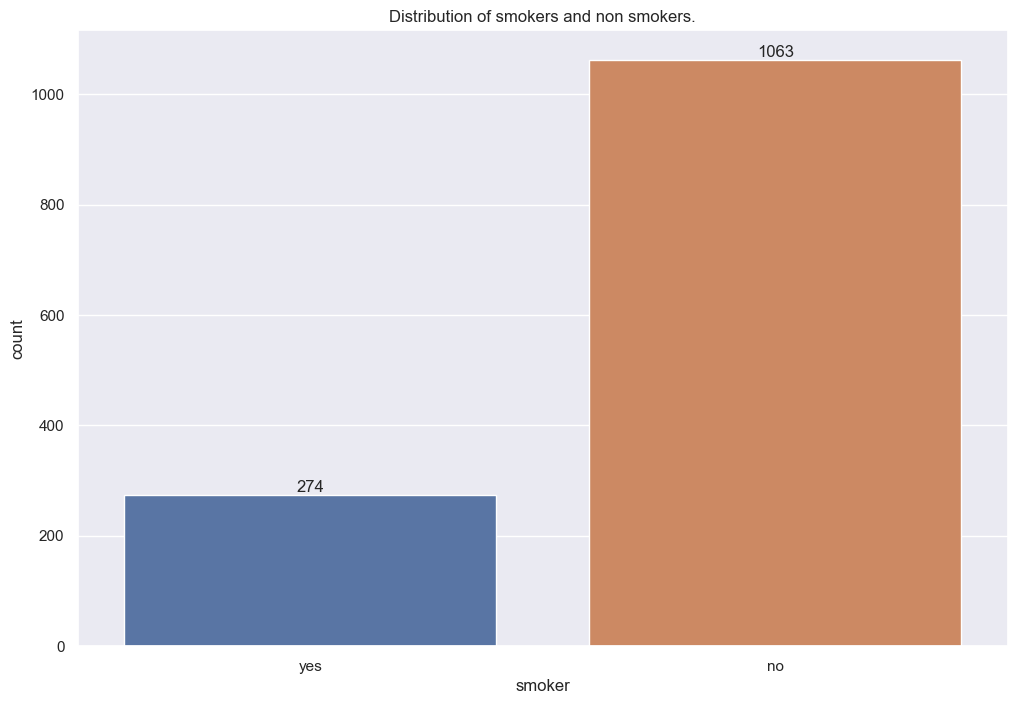

In [15]:
# frequency plot representing the male and female in different regions.
plt.figure(figsize=(12, 8))
sns.set_theme()
plt.title('Distribution of smokers and non smokers.')
ax = sns.countplot(x='smoker', data = categorical_data)
for container in ax.containers:
    ax.bar_label(container)

We can see that a majority of people are non smokers.

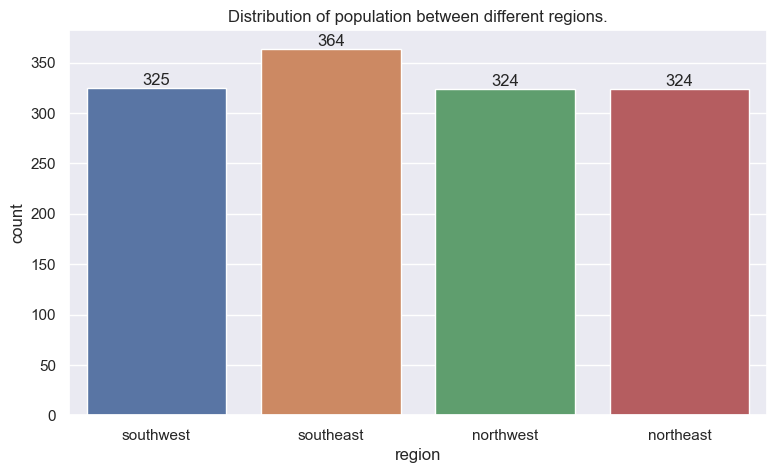

In [16]:
plt.figure(figsize=(9, 5))
sns.set_theme()
plt.title('Distribution of population between different regions.')           
ax = sns.countplot(x='region', data = categorical_data)
for container in ax.containers:
    ax.bar_label(container)

We can see that the population in the northeast, northwest and the southwest is equally distributed, with the southeast
having a slightly higher population.

## Exploring the Insurance Dataset

In [17]:
# recall the dataframe
insurance_data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## What is the age distribution?

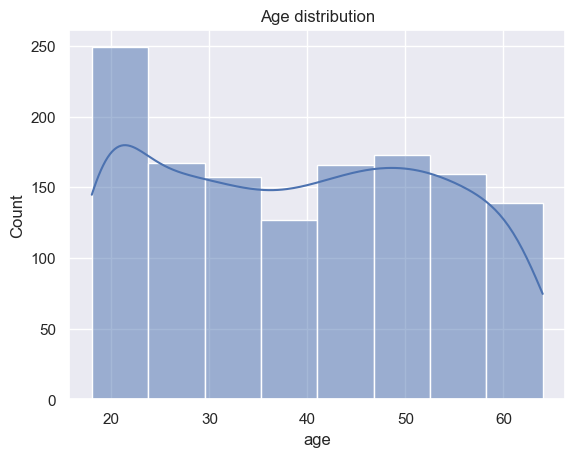

In [18]:
# form a histogram to depict the age distribution
sns.histplot(data= insurance_data, x = 'age', kde = True, stat = 'count', bins=8)
plt.title('Age distribution')
plt.show()

The age distribution histogram is skewed towards the left. This means that their most of the entries in the dataset are younger people.

## What is the BMI distribution?

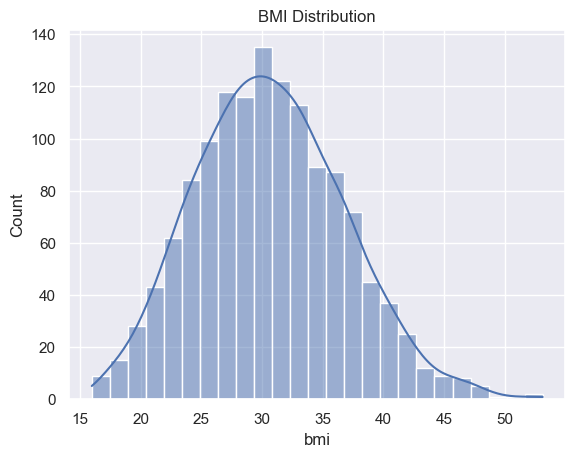

In [19]:
#form a histogram to depict the BMI distribution.
sns.histplot(data= insurance_data, x = 'bmi', kde = True, stat = 'count')
plt.title('BMI Distribution')
plt.show()

The BMI is normally distributed. This tells us that the BMI recorded do not have a large difference between them.

## What is the charges distribution?

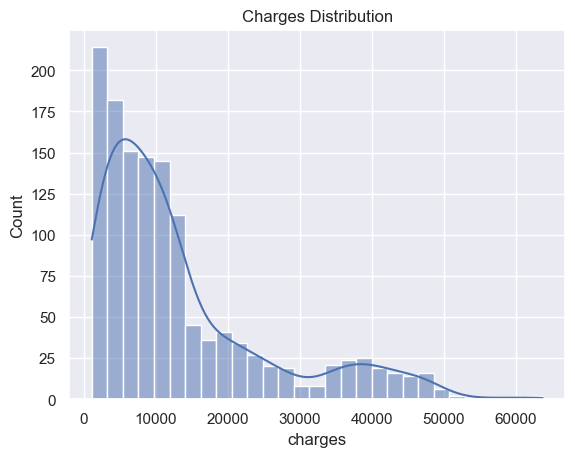

In [20]:
#form a histogram to depict the charges distribution.
sns.histplot(data= insurance_data, x = 'charges', kde = True, stat = 'count')
plt.title('Charges Distribution')
plt.show()

The tail of the distribution is skewed to the right. This indicates that there are fewer cases of high charges and in many cases, the insurance charges tend to be on the lower side.

## What is the relationship between the BMI and the charges?

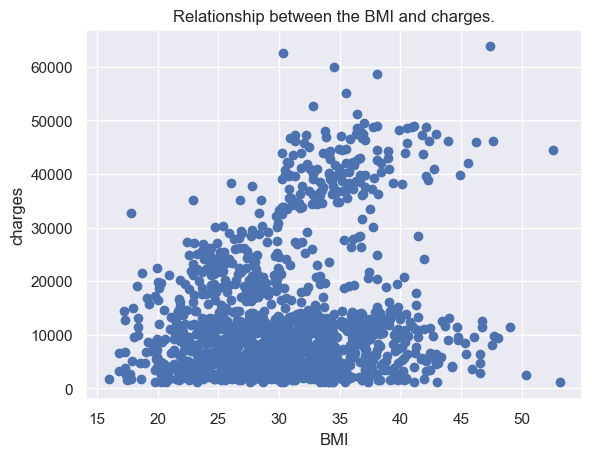

In [21]:
x = insurance_data.bmi
y = insurance_data.charges

plt.scatter(x, y)
plt.xlabel('BMI')
plt.ylabel('charges')
plt.title('Relationship between the BMI and charges.')
plt.show()

The scatter plot suggests a positive correlation between BMI and charges, with a general trend of increasing 
charges as BMI increases. This means that the charges will increase if the BMI increases.

# Does the number of children affect the insurance cost charges?

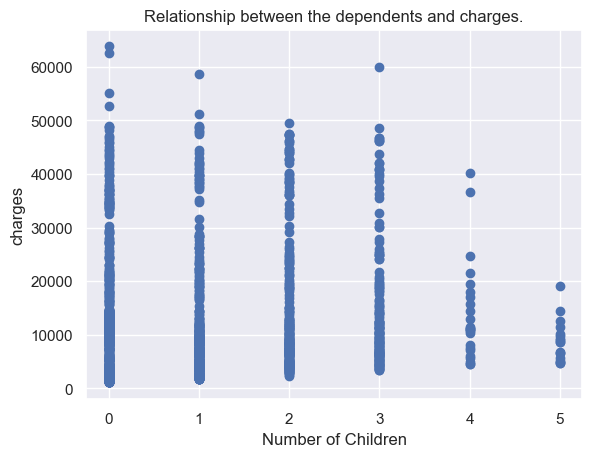

In [22]:
# relationship between the number of dependents(children) and charges
x = insurance_data.children
y = insurance_data.charges

plt.scatter(x, y)
plt.xlabel('Number of Children')
plt.ylabel('charges')
plt.title('Relationship between the dependents and charges.')
plt.show()

We can see that people who have fewer or no children pay a higher insurance costs than those who have many children

# Do people who smoke incur high insurance charges?


In [23]:
# group the smoker column with the charges column.
charges_data = insurance_data.groupby(['smoker', 'sex'])['charges'].mean().unstack()
charges_data

sex,female,male
smoker,,
no,8762.297300,8099.700161
yes,30678.996276,33042.005975


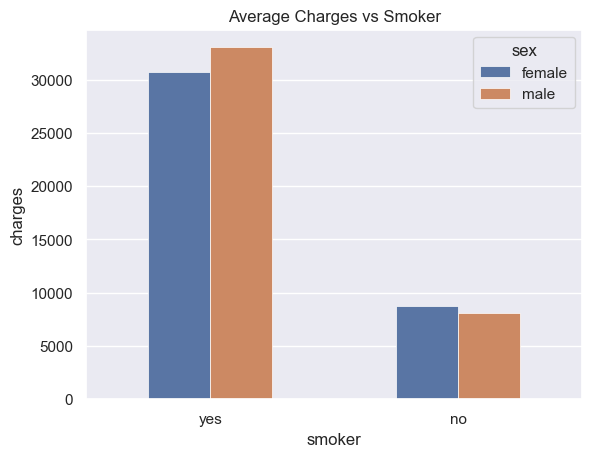

In [24]:
# plot the visualization
sns.barplot(data=insurance_data, x="smoker", y="charges",hue='sex',width=0.5, linewidth=0.5, errorbar=None)
plt.title("Average Charges vs Smoker")
plt.show()

The following observations are made:
1. Both male and female smokers tend to experience high insurance cost charges.
2. Both male and female non smokers tend to experienceloew insurance cost charges.
3. Male smokers end up paying higher insurance charges than female smokers.
4. Female non smokers pay a slightly higher insurance cost charges than male non smokers.


## What is the average cost per region?

In [25]:
# group the charges by region and find the mean average of each region.
insurance_data['charges'].groupby(insurance_data['region']).mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

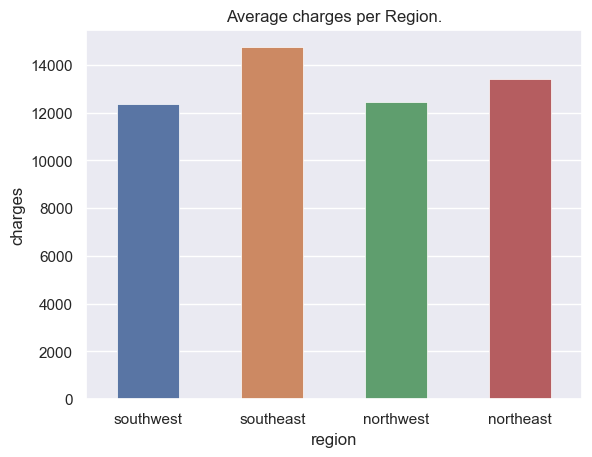

In [26]:
# visualize and explain the result above.
sns.barplot(insurance_data, x='region', y='charges',width=0.5, linewidth=0.5, errorbar=None,)
plt.title('Average charges per Region.')
plt.show()

1. Residents living in the Southeast regions on average pay 14735.411438 which is the highest insurance charges.
2. Residents living in the Southwest region on average pay  12346.937377 which is the lowest insurance charges.

## Which region has residents with the highest average BMI?

In [27]:
#group the BMI with the regions column and find the average BMI per region.
insurance_data['bmi'].groupby(insurance_data['region']).mean()

region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

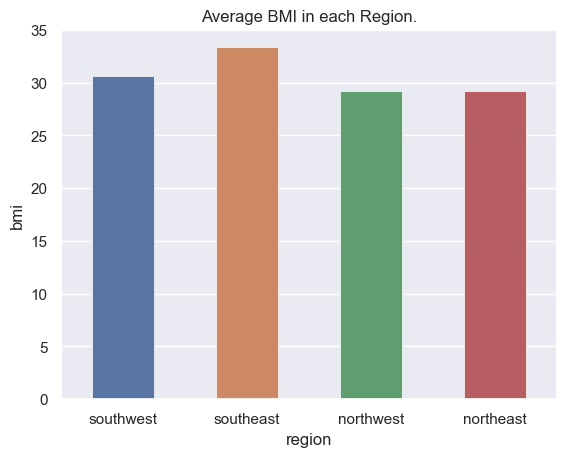

In [28]:
#visualize the results above
sns.barplot(insurance_data, x='region', y='bmi',width=0.5, linewidth=0.5, errorbar=None,)
plt.title('Average BMI in each Region.')
plt.show()

1. Residents living in the Southeast region on average have a bmi of 33.355989 which is the highest in all regions.
2. Residents living in the Northeast and Northwest regions on average have nearly the exact bmi average.